In [2]:
import sklearn
sklearn.__version__ 

'1.5.1'

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#plots to appear inside notebook

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import RocCurveDisplay

In [13]:
df=pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.shape

(303, 14)

In [16]:
 df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

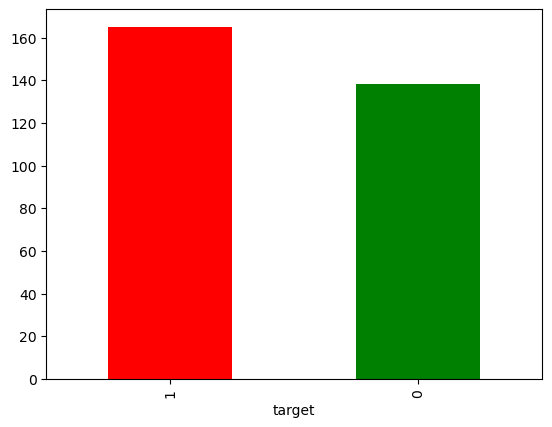

In [19]:
df['target'].value_counts().plot(kind='bar',color=['red','green'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [28]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

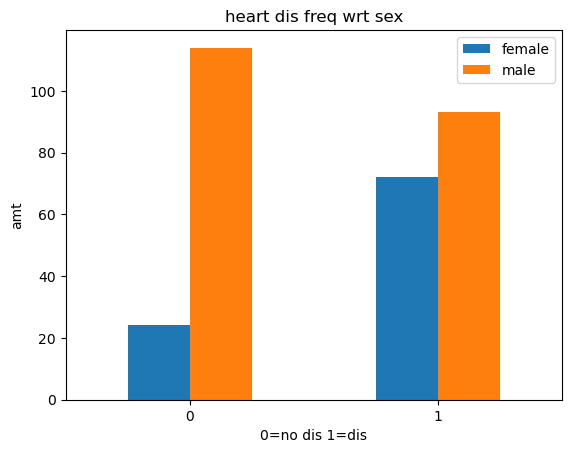

In [31]:
pd.crosstab(df.target,df.sex).plot(kind='bar')
plt.title("heart dis freq wrt sex")
plt.xlabel("0=no dis 1=dis")
plt.ylabel("amt")
plt.legend(['female','male'])
plt.xticks(rotation=1)

In [32]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [33]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

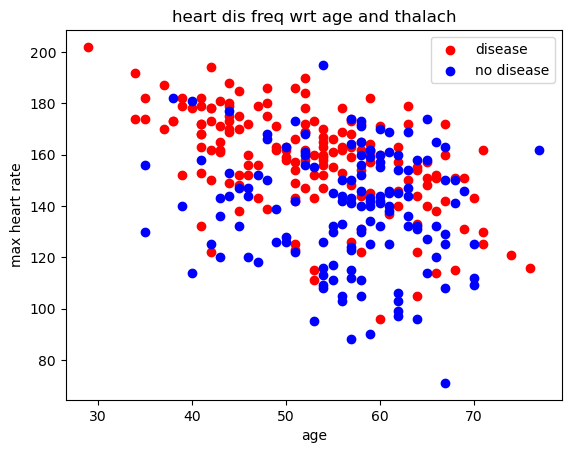

In [36]:
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='blue')
plt.title("heart dis freq wrt age and thalach")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(['disease','no disease'])

<Axes: ylabel='Frequency'>

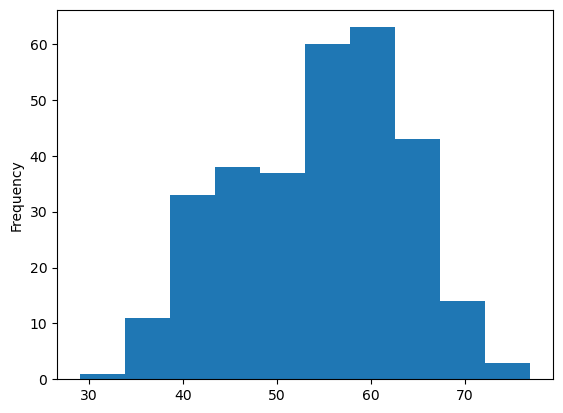

In [37]:
df.age.plot.hist()

In [38]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


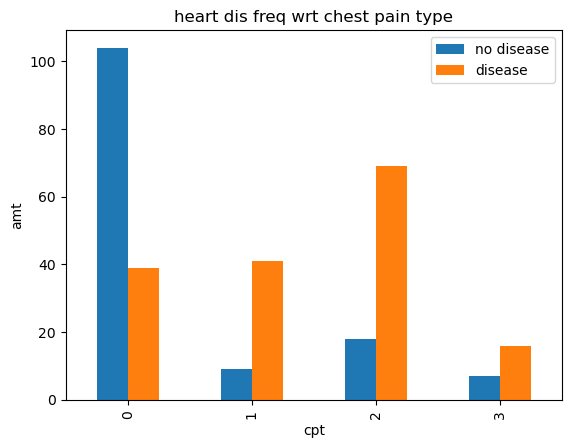

In [41]:
pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.title("heart dis freq wrt chest pain type")
plt.xlabel("cpt")
plt.ylabel("amt")
plt.legend(['no disease','disease'])

In [43]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


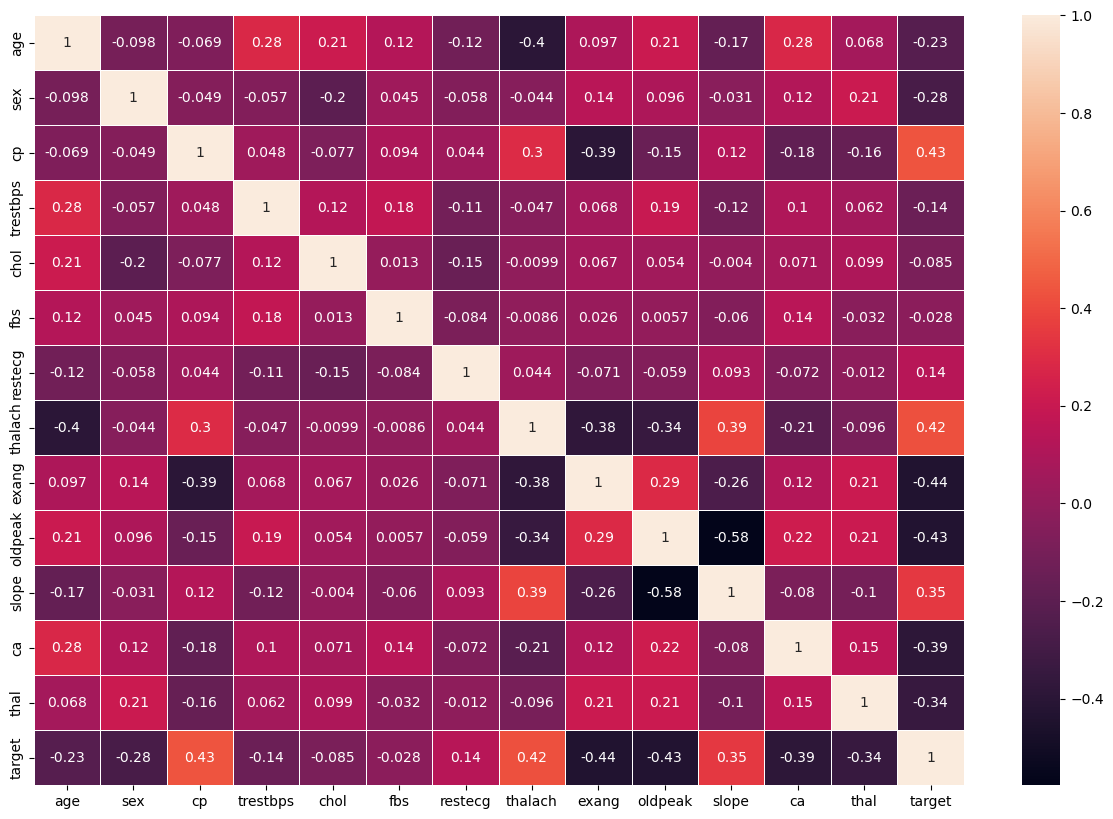

In [44]:
cm=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(cm,annot=True,linewidths=0.5)

In [45]:
x=df.drop('target',axis=1)
y=df['target']
x.shape,y.shape

((303, 13), (303,))

In [46]:
np.random.seed(42)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [47]:
xtrain.shape

(242, 13)

In [53]:
models=({'Logistic Regression':LogisticRegression(),
                    'KNN':KNeighborsClassifier(),
                    'Random Forest':RandomForestClassifier()})
def fitscore(models,xtrain,xtest,ytrain,ytest):
    np.random.seed(42)
    modelscore={}
    for name,model in models.items():
        model.fit(xtrain,ytrain)
        modelscore[name]=model.score(xtest,ytest)
    return modelscore

In [54]:
modelscore=fitscore(models=models,
                         xtrain=xtrain,
                         xtest=xtest,
                         ytrain=ytrain,
                         ytest=ytest)
modelscore

C:\Users\haind\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

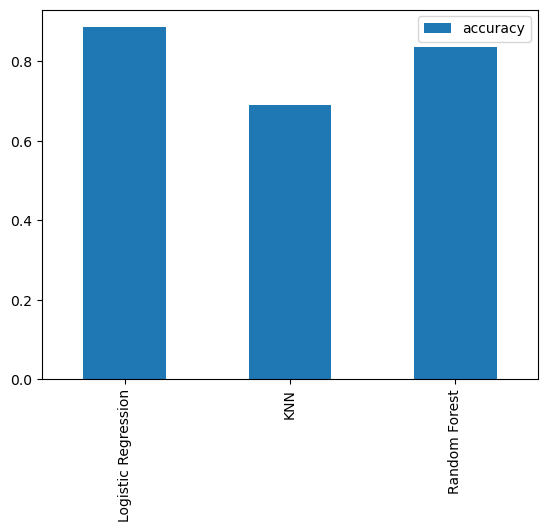

In [56]:
modelcomp=pd.DataFrame(modelscore,index=['accuracy'])
modelcomp.T.plot(kind='bar')

In [59]:
trainsc=[]
testsc=[]
neig=range(1,21)
knn=KNeighborsClassifier()
for i in neig:
    knn.set_params(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainsc.append(knn.score(xtrain,ytrain))
    testsc.append(knn.score(xtest,ytest))

In [60]:
trainsc,testsc

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

max score= 75.40983606557377


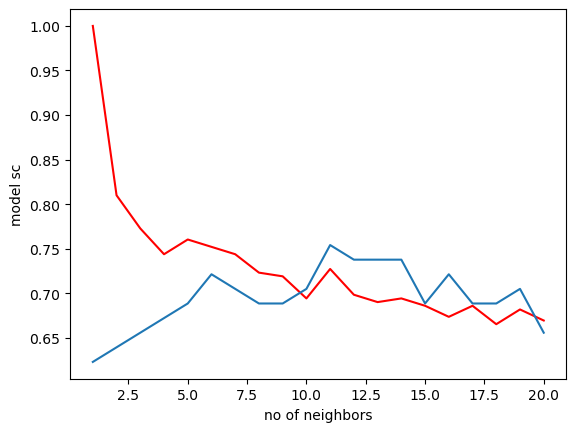

In [62]:
plt.plot(neig,trainsc,label='train score',color='red')
plt.plot(neig,testsc,label='test score')
plt.xlabel("no of neighbors")
plt.ylabel("model sc")
print("max score=",max(testsc)*100)

In [68]:
log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

In [83]:
rf_grid={'n_estimators':np.arange(10,100,50),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

In [84]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,n_iter=20,
                              verbose=True)
rs_log_reg.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [85]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [86]:
rs_log_reg.score(xtest,ytest)

0.8852459016393442

In [87]:
np.random.seed(42)

In [88]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

In [89]:
rs_rf.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [90]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [91]:
modelscore

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [95]:
log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,verbose=True)
gs_log_reg.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [96]:
gs_log_reg.score(xtest,ytest)

0.8852459016393442

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [97]:
ypred=gs_log_reg.predict(xtest)

In [98]:
RocCurveDisplay(gs_log_reg,xtest,ytest)

TypeError: RocCurveDisplay.__init__() takes 1 positional argument but 4 were given

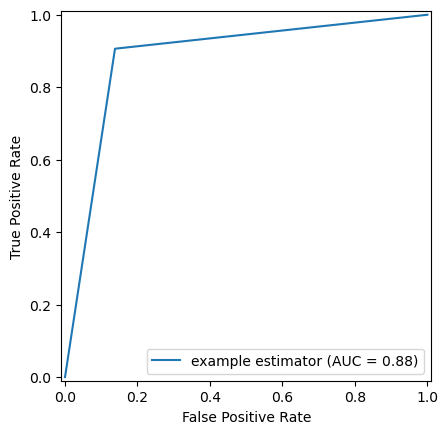

In [102]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [103]:
print(confusion_matrix(ytest,ypred))


[[25  4]
 [ 3 29]]


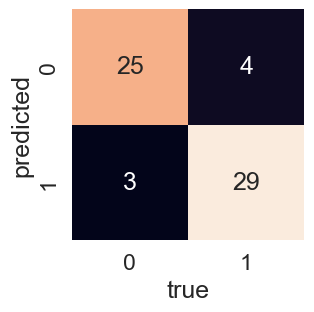

In [105]:
sns.set(font_scale=1.5)
def pltcnfmat(ytest,ypred):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cbar=False)
    plt.xlabel("true")
    plt.ylabel("predicted")
pltcnfmat(ytest,ypred)
    

In [107]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [108]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [111]:
clf=LogisticRegression(C=0.23357214690901212,solver= 'liblinear')

In [112]:
cv_acc=cross_val_score(clf,x,y,cv=5,scoring='accuracy')

In [113]:
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [115]:
cv_acc_m=np.mean(cv_acc)
cv_acc_m

0.8479781420765027

In [116]:
cv_pre=cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_pre

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [117]:
np.mean(cv_pre)

0.8215873015873015

In [119]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [120]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

<Axes: >

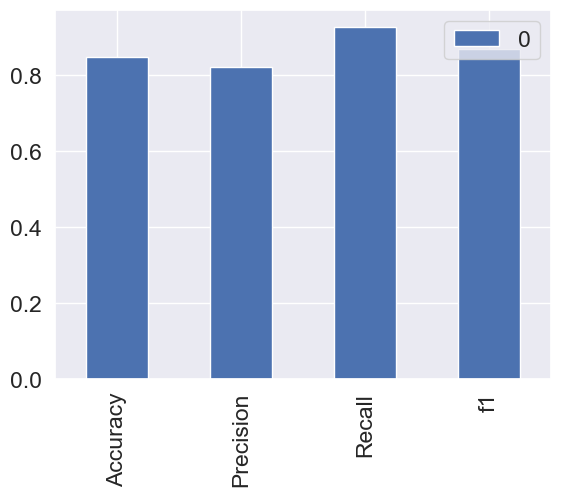

In [122]:
cvm=pd.DataFrame({'Accuracy':np.mean(cv_acc),'Precision':np.mean(cv_pre),'Recall':np.mean(cv_recall),'f1':np.mean(cv_f1)},index=[0])
cvm.T.plot.bar()

In [124]:
clf=LogisticRegression(C=0.23357214690901212,solver= 'liblinear')
clf.fit(xtrain,ytrain)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [125]:
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [126]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0]))
                 )
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

<Axes: title={'center': 'Feature imp'}>

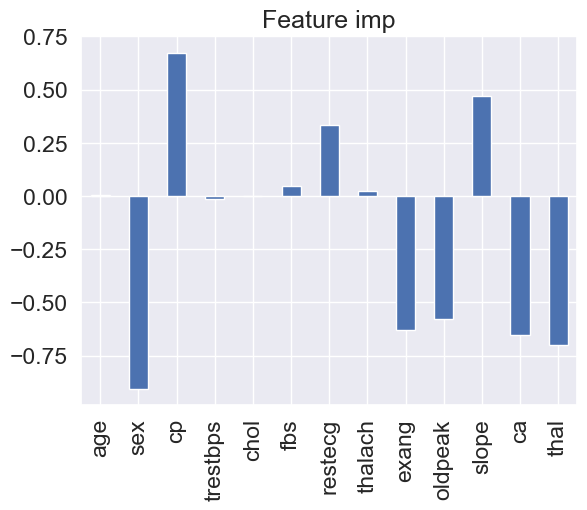

In [127]:
featuredf=pd.DataFrame(feature_dict,index=[0])
featuredf.T.plot.bar(title='Feature imp',legend=False)

In [128]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
